#CS 4786 HW 1

In [369]:
#from __future__ import print_function
from __future__ import division
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import random
import scipy.linalg # http://stackoverflow.com/questions/8728732/what-is-wrong-with-importing-modules-in-scipy-is-it-a-bug

In [370]:
from io import BytesIO
from IPython.core import display
from PIL import Image


def display_pil_image(im):
   """Displayhook function for PIL Images, rendered as PNG."""

   b = BytesIO()
   im.save(b, format='png')
   data = b.getvalue()

   ip_img = display.Image(data=data, format='png', embed=True)
   return ip_img._repr_png_()


# register display func with PNG formatter:
png_formatter = get_ipython().display_formatter.formatters['image/png']
dpi = png_formatter.for_type(Image.Image, display_pil_image)

In [371]:
import os
print("Place data files in '"+os.getcwd()+"/'")

Place data files in '/home/neil/Projects/jupyter-drive/'


##Question 1

###Problem 1

In [372]:
def csv_to_matrix(csv_file):
    return np.loadtxt(open(csv_file),delimiter=",")

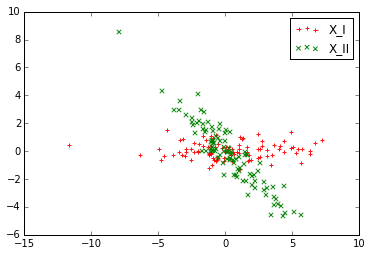

In [373]:
# Make the plot
XI = csv_to_matrix('a1_data/smiley/2d-gaussian.csv')
XII = csv_to_matrix('a1_data/smiley/2d-gaussian-rotated.csv')
plt.scatter(XI.T[0],XI.T[1], c='red', alpha=0.9, marker="+", label="X_I")
plt.scatter(XII.T[0],XII.T[1], c='green', alpha=0.9, marker="x", label="X_II")
legend = plt.legend(loc='upper right', fontsize='large')
plt.show()

###Problem2

In [448]:
def PCA(data, k=None):
    """
    Arugments:
        X: numpy array (n x d)
        k : Number of eigenvalues to k (default is all)
    Returns:
        Y: The modified data
        W: The projection matrix (d x min(k, n_eigs))
        centered: The centered data
    """
    covmat = np.cov(data.T,bias=1)
    # numpy wants the rows to be the features ("variables"),
    # and the columns to be the observations ("instances")
    # 'bias=1' means the normalization is by n.
    print 'covariance matrix:\n', covmat

    evals,evecs = np.linalg.eig(covmat)
    # Sort the eigenvectors by decreasing eigenvalues.
    indices = evals.argsort()[::-1]
    evals = evals[indices]
    evecs = evecs[:,indices]
    print 'eigenvalues:\n', evals
    print 'eigenvectors (as columns) :\n', evecs
    
    #testing
    evec1 = evecs[:,0]
    print 'length of claimed first eigenvector is:', np.linalg.norm(evec1)
    print "checking that the first and second eigenvector are orthogonal; here's their dotproduct: ", np.dot(evec1,evecs[:,1])
    #print "should give back the first eigenvector evecs[:,0]", np.dot(covmat,evecs[:,0])/evals[0]
    ###

    centered = data - data.mean(axis=0) #need axis or get single mean of all entries
    k = min(len(evecs), k) if k is not None else None
    W = evecs.T[0:k]
    Y = np.dot(W, centered.T) 
    return Y, W, centered

In [449]:
YI,WI,UI = PCA(XI)
YII,WII,UII = PCA(XII)
print ("WI", WI)
print ("WII", WII)

covariance matrix:
[[ 9.77244265  0.0450351 ]
 [ 0.0450351   0.32326771]]
eigenvalues:
[ 9.77265729  0.32305307]
eigenvectors (as columns) :
[[ 0.99998864 -0.00476587]
 [ 0.00476587  0.99998864]]
length of claimed first eigenvector is: 1.0
checking that the first and second eigenvector are orthogonal; here's their dotproduct:  0.0
covariance matrix:
[[ 5.09289037 -4.72458757]
 [-4.72458757  5.00282015]]
eigenvalues:
[ 9.77265747  0.32305306]
eigenvectors (as columns) :
[[ 0.71046873  0.70372877]
 [-0.70372877  0.71046873]]
length of claimed first eigenvector is: 1.0
checking that the first and second eigenvector are orthogonal; here's their dotproduct:  0.0
('WI', array([[ 0.99998864,  0.00476587],
       [-0.00476587,  0.99998864]]))
('WII', array([[ 0.71046873, -0.70372877],
       [ 0.70372877,  0.71046873]]))


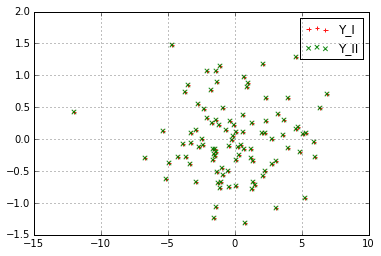

In [450]:
# Make the plot
plt.scatter(YI[0],YI[1], c='red', alpha=0.9, marker="+", label="Y_I")
plt.scatter(YII[0],YII[1], c='green', alpha=0.9, marker="x", label="Y_II")
plt.legend(loc='upper right', fontsize='large')
plt.grid('on')
plt.show()

In [476]:
import math
"""
A = np.array([[.7071068,.7071068],
              [.56,.1]])

A = np.array([[0.71046873, -0.70372877],
              [0.70372877, 0.71046873]])
"""
A = np.array([[.5, (math.sqrt(3)/2)],
              [(math.sqrt(3)/2), .5]])
XI_A = XI.dot(A.T) #check this

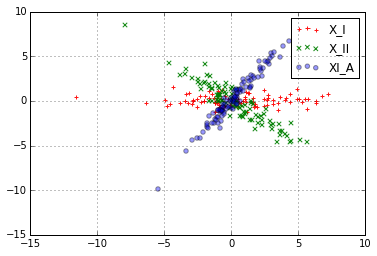

In [477]:
# Make the plot
plt.scatter(XI.T[0],XI.T[1], c='red', alpha=0.9, marker="+", label="X_I")
plt.scatter(XII.T[0],XII.T[1], c='green', alpha=0.9, marker="x", label="X_II")
plt.scatter(XI_A.T[0],XI_A.T[1], c='blue', alpha=0.4, marker="o", label="XI_A")
legend = plt.legend(loc='upper right', fontsize='large')
plt.grid('on')
plt.show()

In [478]:
YIII, WIII, UIII = PCA(XI_A)

covariance matrix:
[[ 2.72456298  4.41660592]
 [ 4.41660592  7.44915045]]
eigenvalues:
[ 10.09553314   0.07818029]
eigenvectors (as columns) :
[[-0.51398428 -0.8577996 ]
 [-0.8577996   0.51398428]]
length of claimed first eigenvector is: 1.0
checking that the first and second eigenvector are orthogonal; here's their dotproduct:  0.0


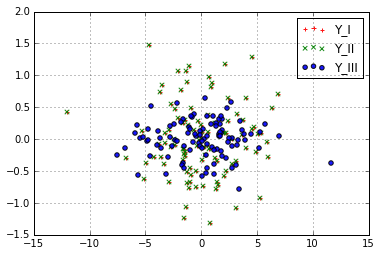

In [479]:
# Make the plot
plt.scatter(YI[0],YI[1], c='red', alpha=0.9, marker="+", label="Y_I")
plt.scatter(YII[0],YII[1], c='green', alpha=0.9, marker="x", label="Y_II")
plt.scatter(YIII[0],YIII[1], c='blue', alpha=0.9, marker="o", label="Y_III")

plt.legend(loc='upper right', fontsize='large')
plt.grid('on')
plt.show()

### Making smileys

In [455]:
#Loading Data
smile  = csv_to_matrix('a1_data/smiley/X_smilie.csv')
cube_y = csv_to_matrix('a1_data/smiley/cubist_email.csv')

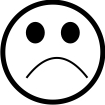

In [456]:
#Testing making an image from a smile
img = Image.new( 'RGB', (105,105), "black") # create a new black image
pixels = img.load() # create the pixel map
pos = 0
for i in range(img.size[0]):    # for every pixel:
    for j in range(img.size[1]):
        rgb_val = int(smile[0][pos])
        pos += 1
        pixels[i,j] = (rgb_val, rgb_val, rgb_val) # set the colour accordingly
img

In [457]:
# Building smile matrix
X_smile = np.zeros((105,105))
pos = 0
for i in range(105):
    for j in range(105):
        X_smile[i][j] = smile[0][pos]
        pos += 1

In [458]:
Y_smile, W_smile, U_smile = PCA(X_smile)

covariance matrix:
[[  8352.51609977   8526.55147392   7814.53650794 ...,   8331.77188209
    8768.63673469   3341.65442177]
 [  8526.55147392  11844.45950113  11560.5231746  ...,  12003.29977324
    9725.95401361   3016.78802721]
 [  7814.53650794  11560.5231746   13645.06793651 ...,  12284.65079365
    8925.34095238   2764.59809524]
 ..., 
 [  8331.77188209  12003.29977324  12284.65079365 ...,  12389.03582766
    9518.94965986   2948.29931973]
 [  8768.63673469   9725.95401361   8925.34095238 ...,   9518.94965986
    9516.26340136   3262.50965986]
 [  3341.65442177   3016.78802721   2764.59809524 ...,   2948.29931973
    3262.50965986   1761.12598639]]
eigenvalues:
[  2.94246522e+05   1.51986964e+05   1.47190856e+05   9.55040733e+04
   6.48719132e+04   4.78968700e+04   3.28172613e+04   1.97546197e+04
   1.64874791e+04   1.28574883e+04   1.10908125e+04   8.91970181e+03
   8.01743802e+03   6.22831162e+03   5.31959485e+03   4.78483079e+03
   4.10661842e+03   3.89122261e+03   3.32568784e

In [471]:
np.add(W_smile.dot(Y_smile),U_smile)

array([[  89.1776018 ,   86.33026217,   46.92011453, ...,   80.50080489,
           7.78478272,   82.57428972],
       [ -12.17484315,   25.99600677,   48.19469698, ...,    8.7114855 ,
          35.82617983,  -27.3940083 ],
       [-110.92739715, -159.01373611,  -97.15594829, ..., -105.50902209,
        -142.38143863, -212.79997022],
       ..., 
       [  45.16254183,   71.49744996,   64.297615  , ...,   69.16723669,
          48.30681652,   10.51757398],
       [  45.6762302 ,   69.79067189,   79.18626684, ...,   71.40423052,
          54.21606958,   20.18600038],
       [  42.04915258,   76.99208083,   79.4775139 , ...,   87.60824624,
          48.73221877,    5.84129624]])

In [466]:
X_smile

array([[ 255.,  255.,  255., ...,  255.,  255.,  255.],
       [ 255.,  255.,  255., ...,  255.,  255.,  255.],
       [ 255.,  255.,  255., ...,  255.,  255.,  255.],
       ..., 
       [ 255.,  255.,  255., ...,  255.,  255.,  255.],
       [ 255.,  255.,  255., ...,  255.,  255.,  255.],
       [ 255.,  255.,  255., ...,  255.,  255.,  255.]])

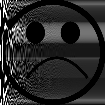

In [475]:
#Testing making an image from a smile
img = Image.new( 'RGB', (105,105), "black") # create a new black image
pixels = img.load() # create the pixel map
pos = 0
for i in range(img.size[0]):    # for every pixel:
    for j in range(img.size[1]):
        rgb_val = int(Y_smile[i][j]) + int(U_smile[i][j])
        pixels[i,j] = (rgb_val, rgb_val, rgb_val) # set the colour accordingly
img